<a href="https://colab.research.google.com/github/Siddhi-More17/oibsip_taskno/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/car data.csv")
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
df.replace({'Selling_type':{'Dealer':0, 'Individual':1}}, inplace=True)
df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [ ]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 2)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
LR_model = LinearRegression()

In [ ]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = LR_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(y_train, pred)

In [ ]:
print("R squared Error: ", error_score)

R squared Error:  0.8796483009370215


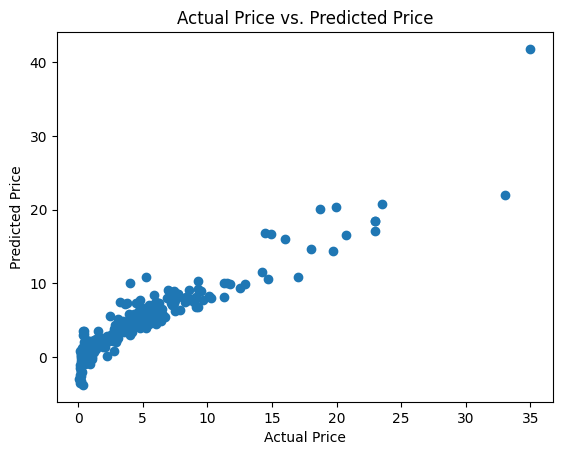

In [ ]:
plt.scatter(y_train, pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()

In [ ]:
pred2 = LR_model.predict(X_test)

In [ ]:
error = metrics.r2_score(y_test, pred2)
print("R squared Error: ", error)

R squared Error:  0.8365861023210703


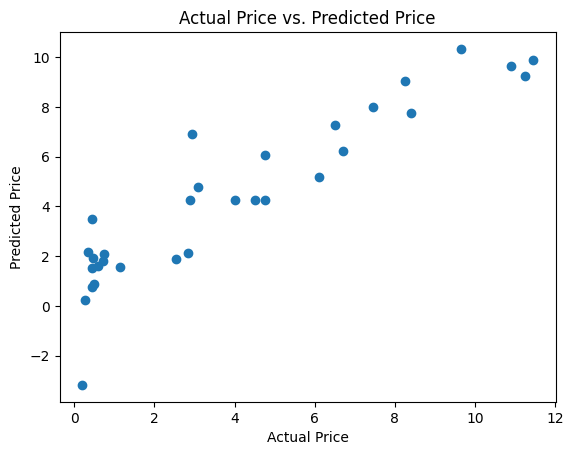

In [ ]:
plt.scatter(y_test, pred2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()